<h2>FPMI contrast ratio</h2>

In [31]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy.signal                
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

<h3>Simple FPMI, no isol, no TEMs</h3>

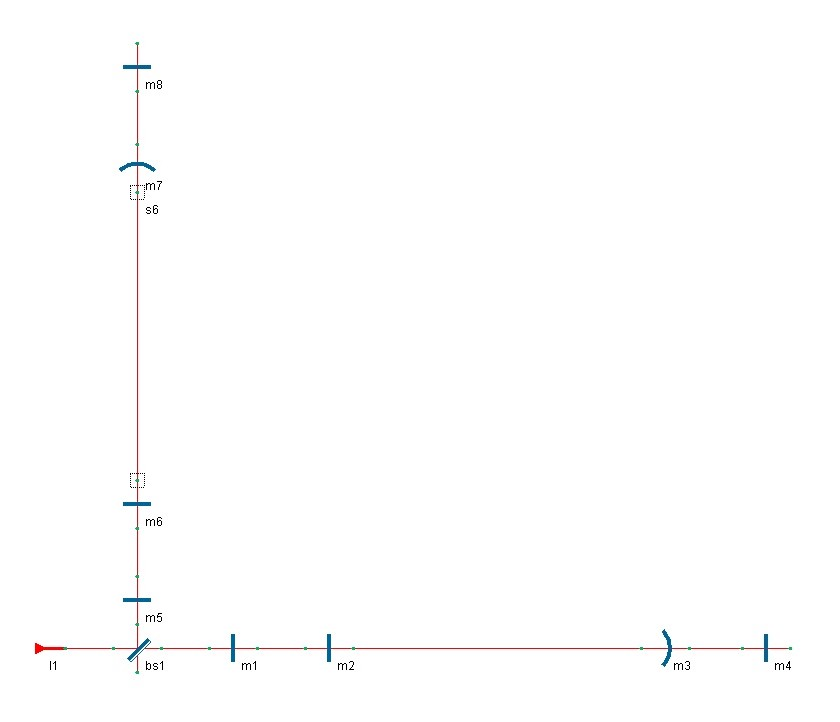

In [46]:
display.Image("C:/Users/Parivesh/Desktop/9.1m.jpg",width = 500, height = 300)

In [41]:
base1=""" 
l L0 10 0 n0                                  #input laser
s s1 1 n0 n1                                  #length

bs bs1 0.5 0.5 0 0 n1 n2 n3 n4                #beam splitter

s sx 1 n2 n5                                  #length b/w BS and ITM

m itmx0 0 1 0 n5 n6                           #ITM 1st surface
s itmx_l 0.035 1.44963 n6 n7                  #thickness of mirror
m2 itmx 0.99 50u 0 n7 n8                      #ITM 2nd surface

s s2 9.1 n8 n9                                #arm length

m2 etmx 0.998 50u 0 n9 n10                    #ETM 1st surface
s etmx_l 0.035 1.44963 n10 n11
m etmx0 0 1 0 n11 dump


s sy 1 n3 n13

m itmy0 0 1 0 n13 n14  
s itmy_l 0.035 1.44963 n14 n15 
m2 itmy 0.99 50u 0 n15 n16 

s s3 9.1 n16 n17

m2 etmy 0.998 50u 0 n17 n18
s etmy_l 0.035 1.44963 n18 n19
m etmy0 0 1 0 n19 n20


attr etmy Rcx 31                            #Roc of ETMs
attr etmy Rcy 31
attr etmx Rcx 31
attr etmx Rcy 31

xaxis etmy phi lin -220 220 10000           #micro tune of ETMy

pd AS_port n4

pd trans_etmx n20

"""

In [ ]:
basekat= finesse.kat() 
basekat.verbose = 1
basekat.parse(base1)
out = basekat.run()


--- Output info ---

Run date and time: 2021-07-08 15:39:16.939635
Detectors used: AS_port, trans_etmx

One xaxis used: ['xaxis etmy phi lin -220 220 10000']
AS_port    : min = 2.898590799610310e-01 max = 4.348973420168640e+00
trans_etmx : min = 2.439950115207480e-05 max = 2.687576669757550e+00


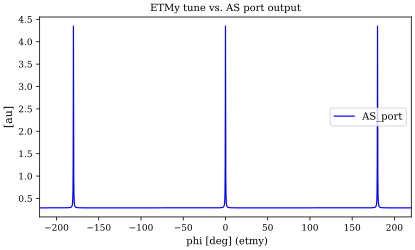

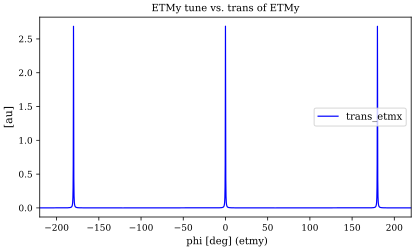

Contrast Ratio :  0.8750292967237214


In [48]:
out.info()
out.plot(['AS_port'],title="ETMy tune vs. AS port output")
out.plot(['trans_etmx'],title="ETMy tune vs. trans of ETMy")
print("Contrast Ratio : ",(np.max(out['AS_port'])-np.min(out['AS_port']))/(np.max(out['AS_port'])+np.min(out['AS_port'])))

<h3>FPMI, add isol, till TEM30</h3>

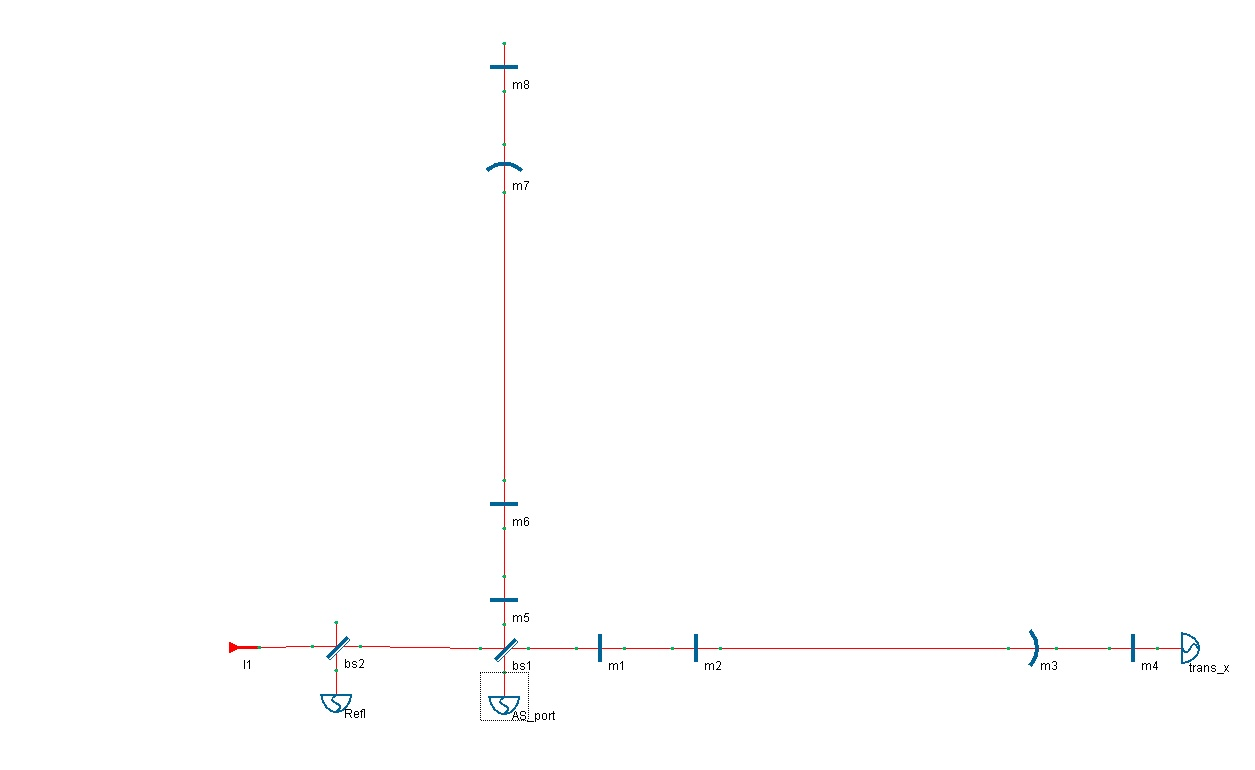

In [45]:
display.Image("C:/Users/Parivesh/Desktop/9.1m_v1.jpg",width = 500, height = 300)

In [54]:
codebase=""" 
l L0 10 0 n0
s s1 1 n0 nF1

dbs FI nF1 nF2 nF3 nRefl
s isl_c 1 nF3 n1

tem L0 0 0 1 0                         #tem modes
tem L0 1 0 1 0
tem L0 2 0 1 0 
tem L0 3 0 1 0 

bs bs1 0.5 0.5 0 0 n1 n2 n3 n4

s sx 1 n2 n5

m itmx0 0 1 0 n5 n6  
s itmx_l 0.035 1.44963 n6 n7 
m2 itmx 0.99 50u 0 n7 n8 

s s2 9.1 n8 n9

m2 etmx 0.998 50u 0 n9 n10
s etmx_l 0.035 1.44963 n10 n11
m etmx0 0 1 0 n11 dump


s sy 1 n3 n13

m itmy0 0 1 0 n13 n14  
s itmy_l 0.035 1.44963 n14 n15 
m2 itmy 0.99 50u 0 n15 n16 

s s3 9.1 n16 n17

m2 etmy 0.998 50u 0 n17 n18
s etmy_l 0.035 1.44963 n18 n19
m etmy0 0 1 0 n19 n20


attr etmy Rcx 31
attr etmy Rcy 31
attr etmx Rcx 31
attr etmx Rcy 31

xaxis etmy phi lin -220 220 10000

maxtem 3
phase 2

cav NC1 itmx n8 etmx n9
cav NC2 itmy n16 etmy n17


pd AS_port n4
pd refl nRefl

ad order0 0 0 0 n20                     #ad detectors
ad order1 1 0 0 n20
ad order2 2 0 0 n20
ad order3 3 0 0 n20



pd trans_etmx n20

"""


In [55]:
basekat= finesse.kat() 
basekat.verbose = 1
basekat.parse(codebase)
out1 = basekat.run()

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2021-07-08 15:51:40.713995


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 3.68551 seconds



--- Output info ---

Run date and time: 2021-07-08 15:51:40.715101
Detectors used: AS_port, order0, order1, order2, order3, refl, trans_etmx

One xaxis used: ['xaxis etmy phi lin -220 220 10000']
AS_port    : min = 5.146584659626480e+00 max = 8.586796101008799e+00
refl       : min = 1.363904946254840e-37 max = 3.440806454742110e+00
order0     : min = 2.469792559714010e-03 max = 8.196915074827770e-01
order1     : min = 2.469792411287560e-03 max = 8.171334486329090e-01
order2     : min = 2.469792429523520e-03 max = 8.186625857789750e-01
order3     : min = 2.469792454657520e-03 max = 8.193461768824259e-01
trans_etmx : min = 4.184117990872190e-05 max = 6.719285338389800e-01


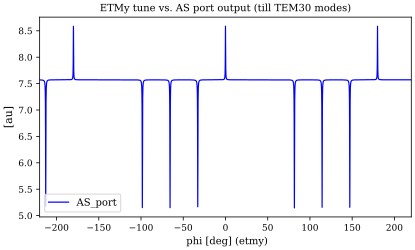

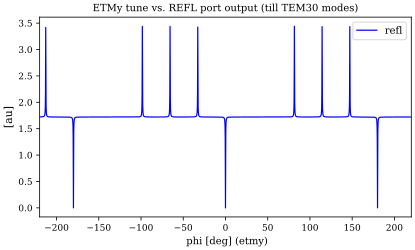

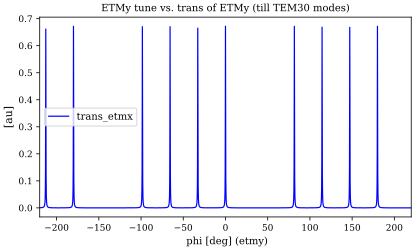

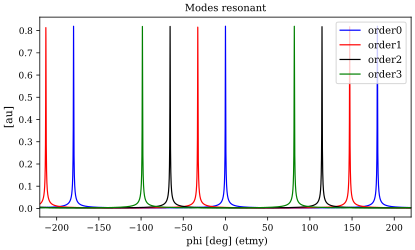

Contrast Ratio :  0.25049996802267216


In [56]:
out1.info()
out1.plot(['AS_port'],title="ETMy tune vs. AS port output (till TEM30 modes)")
out1.plot(['refl'],title="ETMy tune vs. REFL port output (till TEM30 modes)")
out1.plot(['trans_etmx'],title="ETMy tune vs. trans of ETMy (till TEM30 modes)")
out1.plot(['order0','order1','order2','order3'],title="Modes resonant")
print("Contrast Ratio : ",(np.max(out1['AS_port'])-np.min(out1['AS_port']))/(np.max(out1['AS_port'])+np.min(out1['AS_port'])))